In [65]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import pandas as pd

seed = 0

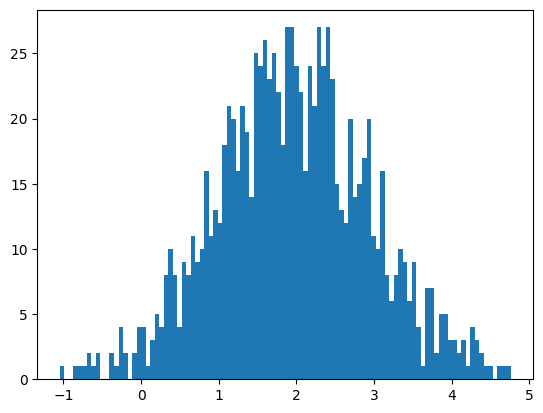

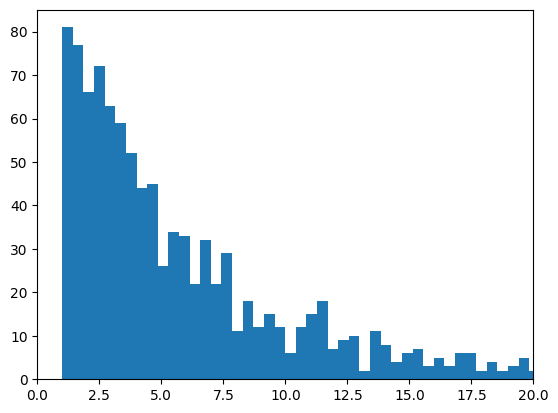

In [59]:
# Generate samples from a number of distributions.
# There is R distinct resources, each generating from the normal process.
# Parameters of the normal distribution differ between R's, but remain
# constant for a given R.
# The number M of available samples per R varies as well, and is drawn
# from gamma distribution.
# Total number of samples drawn is N.

plt.hist(stats.norm.rvs(size=1000, loc=2, scale=1, random_state=seed), bins=100)
plt.show()

plt.hist(stats.gamma.rvs(size=1000, a=1, loc=1, scale=5, random_state=seed), bins=100)
plt.xlim(0,20)
plt.show()


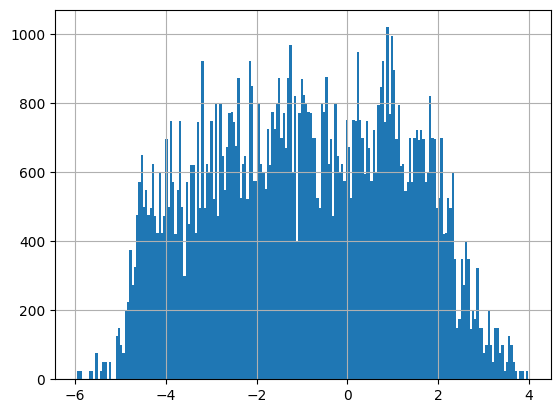

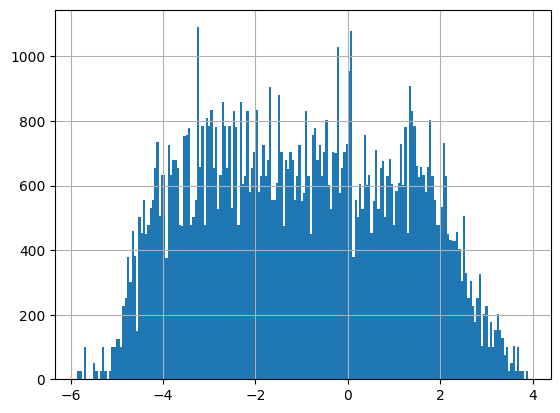

In [93]:
class Resource:
    def __init__(self, id, loc, scale, m, seed):
        self.id = id
        self.loc = loc
        self.scale = scale
        self.m = m
        self.seed = seed

    def generate(self):
        return stats.norm.rvs(size=self.m, loc=self.loc, scale=self.scale, random_state=seed)

def generate(
    seed=0,
    n=100000,
    r=1000,
    r_loc=(-5,2),
    r_scale=(0.1,1),
    m_a=1,
    m_loc=1,
    m_scale=3
    ):

    random.seed(seed)
    ms = stats.gamma.rvs(size=r, a=m_a, loc=m_loc, scale=m_scale, random_state=seed)
    resources = []
    for r in range(0, r, 1):
        resources.append(
            Resource(
                id='/%s' % r,
                loc=random.uniform(*r_loc),
                scale=random.uniform(*r_scale),
                m=round(ms[r]),
                seed=seed
                )
            )
    
    collected = []
    count = 0
    while count<n:
        for resource in resources:
            if count>n:
                break
            
            gen = resource.generate()
            count += len(gen)
            for g in gen:
                collected.append([resource.id, g])

    return collected
    


d = pd.DataFrame(generate(seed=0), columns=['id', 'val'])

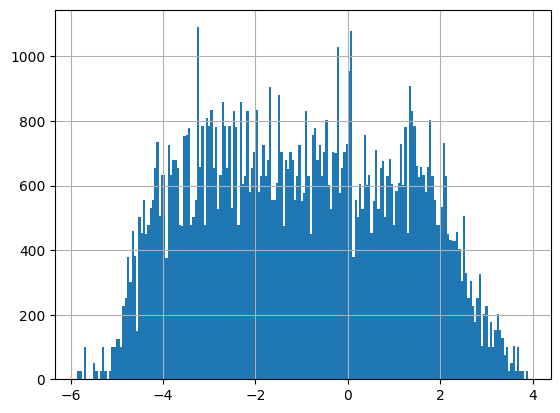

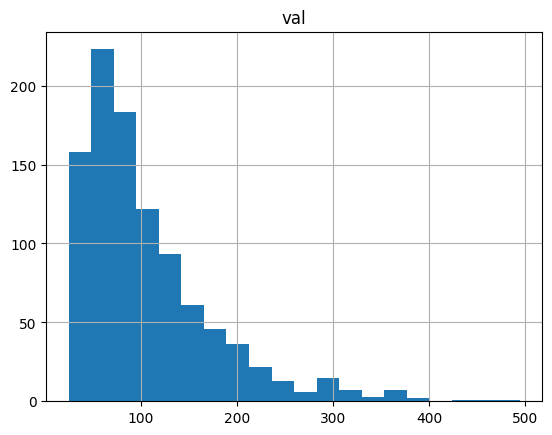

count    1000.000000
mean      100.002000
std        73.629854
min        25.000000
25%        50.000000
50%        75.000000
75%       125.000000
max       494.000000
Name: id, dtype: float64

In [103]:

d['val'].hist(bins=200)
plt.show()

d.groupby(['id']).count().hist(bins=20)
plt.show()

d['id'].value_counts().sort_values().describe()